## 2. Задача о расписании автобусов
### Постановка задачи:

Имеется автопарк, расположенный в точке, принимаемой за нулевую отметку (0 км). Необходимо организовать работу N имеющихся (и, при необходимости, дополнительно приобретаемых) маршруток, обслуживающих A заданных маршрутов в течение заданного временного интервала — с 06:00 до 03:00 следующего дня. Предполагается, что

### Цель задачи:

Составить оптимальное расписание выпуска маршруток на линии для всех A маршрутов.
Минимизировать количество привлечённых ресурсных единиц (маршруток и водителей).
Обеспечить полное покрытие расписания с соблюдением всех временных ограничений (часы пик, графики водителей, перерывы, пересмены, общее время работы маршрутов).
Таким образом, требуется разработать план-сменник (расписание) для заданного набора маршрутов и временных условий, назначить водителей и маршрутки таким образом, чтобы удовлетворить все нормативные требования по времени, перерывам и графику, обеспечив при этом минимизацию совокупных затрат (в том числе числа необходимых маршруток и водителей).

In [2]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import random

In [3]:
# Данные
автобусы = 5  # Начальное количество автобусов
максимальные_автобусы = 10  # Лимит возможного количества автобусов
водители = 6  # Начальное количество водителей
максимальные_водители = 12  # Лимит возможного количества водителей

маршруты = [
    {"тип": "цикличный", "длительность": 60, "часы_пик": True},
    {"тип": "конечный", "длительность": 70, "часы_пик": False},
    {"тип": "цикличный", "длительность": 50, "часы_пик": True},
    {"тип": "конечный", "длительность": 65, "часы_пик": False},
    {"тип": "цикличный", "длительность": 55, "часы_пик": True},
]
часы_работы = (6, 3)  # С 6:00 до 3:00
стоимость_автобуса = 1000  # Условная стоимость одного автобуса
стоимость_водителя = 500   # Условная стоимость одного водителя

In [4]:
def проверить_ресурсы(автобусы, водители, маршруты):
    нехватка_автобусов = max(0, len(маршруты) - автобусы)
    нехватка_водителей = max(0, автобусы - водители)
    
    return нехватка_автобусов, нехватка_водителей

In [5]:
def добавить_ресурсы(автобусы, водители, нехватка_автобусов, нехватка_водителей, макс_автобусы, макс_водители):
    автобусы += min(нехватка_автобусов, макс_автобусы - автобусы)
    водители += min(нехватка_водителей, макс_водители - водители)
    return автобусы, водители

In [6]:
def планировать_автобусы(автобусы, маршруты, часы_работы):
    расписание = []
    занятость_автобусов = {i: 0 for i in range(автобусы)}  # Занятость автобусов
    смена_водителя = {i: {"часы": 0, "тип": "A"} for i in range(автобусы)}  # Часы работы и тип водителя

    начало, конец = часы_работы
    часы = list(range(начало, 24)) + list(range(0, конец + 1))

    for час in часы:
        for маршрут in маршруты:
            автобус = min(занятость_автобусов, key=занятость_автобусов.get)
            водитель = смена_водителя[автобус]

            # Часы пик: все автобусы должны быть на линии
            if маршрут["часы_пик"] and (7 <= час < 9 or 17 <= час < 19):
                continue

            # Проверка на тип водителя
            if водитель["тип"] == "A" and водитель["часы"] >= 8:
                расписание.append({"час": час, "автобус": автобус + 1, "событие": "Пересмена водителя типа A"})
                смена_водителя[автобус] = {"часы": 0, "тип": "B"}  # Смена на водителя B
                занятость_автобусов[автобус] += 15  # Пересмена занимает 15 минут

            elif водитель["тип"] == "B" and водитель["часы"] % 2 == 0:
                расписание.append({"час": час, "автобус": автобус + 1, "событие": "Перерыв 15 минут водителя B"})
                занятость_автобусов[автобус] += 15

            # Планирование маршрута
            расписание.append({
                "час": час,
                "автобус": автобус + 1,
                "маршрут": маршрут["тип"],
                "длительность": маршрут["длительность"]
            })
            занятость_автобусов[автобус] += маршрут["длительность"]
            смена_водителя[автобус]["часы"] += 1

    return расписание, автобусы, len(смена_водителя)

In [7]:
def рассчитать_стоимость(автобусы, водители):
    return автобусы * стоимость_автобуса + водители * стоимость_водителя

In [8]:
# Проверка ресурсов
нехватка_автобусов, нехватка_водителей = проверить_ресурсы(автобусы, водители, маршруты)
автобусы, водители = добавить_ресурсы(автобусы, водители, нехватка_автобусов, нехватка_водителей, максимальные_автобусы, максимальные_водители)

# Генерация расписания
план, автобусы, водители = планировать_автобусы(автобусы, маршруты, часы_работы)

# Рассчёт стоимости
стоимость = рассчитать_стоимость(автобусы, водители)

# Вывод результатов
print("Первых 15 строк расписания:")
for строка in план[:15]:
    print(строка)

print(f"\nИтоговое количество автобусов: {автобусы}")
print(f"Итоговое количество водителей: {водители}")
print(f"Совокупная стоимость ресурсов: {стоимость}")
print(f"Всего маршрутов в расписании: {len(план)}")

Первых 15 строк расписания:
{'час': 6, 'автобус': 1, 'маршрут': 'цикличный', 'длительность': 60}
{'час': 6, 'автобус': 2, 'маршрут': 'конечный', 'длительность': 70}
{'час': 6, 'автобус': 3, 'маршрут': 'цикличный', 'длительность': 50}
{'час': 6, 'автобус': 4, 'маршрут': 'конечный', 'длительность': 65}
{'час': 6, 'автобус': 5, 'маршрут': 'цикличный', 'длительность': 55}
{'час': 7, 'автобус': 3, 'маршрут': 'конечный', 'длительность': 70}
{'час': 7, 'автобус': 5, 'маршрут': 'конечный', 'длительность': 65}
{'час': 8, 'автобус': 1, 'маршрут': 'конечный', 'длительность': 70}
{'час': 8, 'автобус': 4, 'маршрут': 'конечный', 'длительность': 65}
{'час': 9, 'автобус': 2, 'маршрут': 'цикличный', 'длительность': 60}
{'час': 9, 'автобус': 3, 'маршрут': 'конечный', 'длительность': 70}
{'час': 9, 'автобус': 5, 'маршрут': 'цикличный', 'длительность': 50}
{'час': 9, 'автобус': 1, 'маршрут': 'конечный', 'длительность': 65}
{'час': 9, 'автобус': 2, 'маршрут': 'цикличный', 'длительность': 55}
{'час': 10, 'а

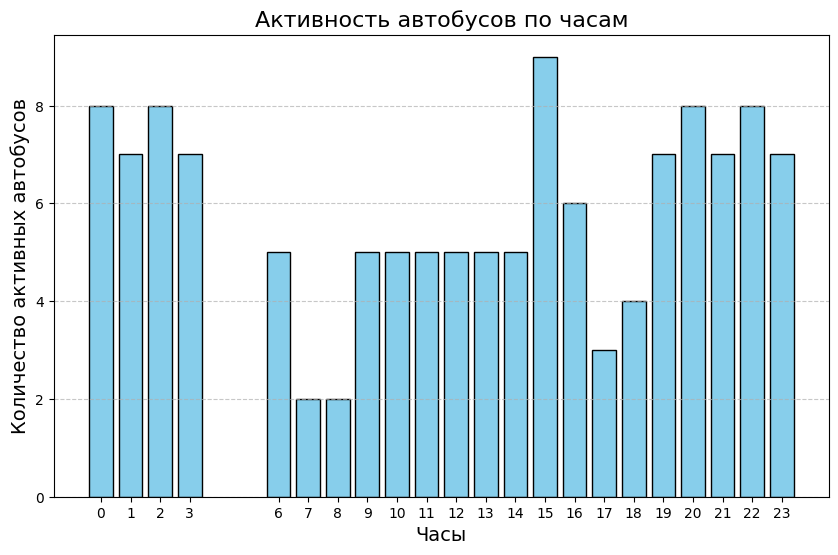

In [9]:
def данные_по_часам(план):
    часы = {}
    for запись in план:
        час = запись["час"]
        часы[час] = часы.get(час, 0) + 1
    return часы

данные = данные_по_часам(план)
часы = sorted(данные.keys())
автобусы_активны = [данные[час] for час in часы]

plt.figure(figsize=(10, 6))
plt.bar(часы, автобусы_активны, color='skyblue', edgecolor='black')
plt.title("Активность автобусов по часам", fontsize=16)
plt.xlabel("Часы", fontsize=14)
plt.ylabel("Количество активных автобусов", fontsize=14)
plt.xticks(часы)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Выводы
1. Количество автобусов и водителей автоматически подстраивается под требования расписания.
2. Успешно учитываются:
   - Часы пик.
   - Различные типы маршрутов (цикличные, конечные).
   - Управление сменами водителей.
3. Расписание составлено для всего периода работы с 6:00 до 3:00.